# Homework Assignment 2

In [1]:
# import necessary packages
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# reading csv data file
df = read_csv("myClassDataSet2.csv")

# data prep
array = df.values
data = array[:,0:10]
target = array[:,10]

## Problem 1

### (a) + (b)

In [2]:
# creating LogisticRegression model and cross-validation RepeatedKFold
logReg = LogisticRegression(solver="liblinear")
repKFold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=4)

# scoring and print
model = logReg
results_acc = cross_val_score(model, data, target, cv=repKFold, scoring='accuracy')
results_neg = cross_val_score(model, data, target, cv=repKFold, scoring='neg_log_loss')
results_roc = cross_val_score(model, data, target, cv=repKFold, scoring='roc_auc')
print("Accuracy: %.3f" % results_acc.mean())
print("Neg Log Loss: %.3f" % results_neg.mean())
print("ROC AUC: %.3f" % results_roc.mean())

Accuracy: 0.941
Neg Log Loss: -0.197
ROC AUC: 0.968


 > Individually our scores show good promise for our model, but together is where they really show that it is a good fit. Primarily seeing a good ROC AUC score with accuracy shows that our accuracy score could be taken at face value. 

### (c)

In [3]:
# new cross-validation and models to compare with model above
kFold = KFold(n_splits=10, random_state=4, shuffle=True)
linearDA = LinearDiscriminantAnalysis()
kNeighbors = KNeighborsClassifier()
gaussianNB = GaussianNB()
sVM = SVC()

testModels=[]
testModels.append(("LDA", linearDA))
testModels.append(("LR", logReg))
testModels.append(("KNN", kNeighbors))
testModels.append(("GNB", gaussianNB))
testModels.append(("SVM", sVM))

# run through each algorithm and output mean & std
totalResults = []
algNames = []
for name, model in testModels:
    results = cross_val_score(model, data, target, cv=kFold, scoring='accuracy')
    algNames.append(name)
    totalResults.append(results)
    print( "%s: %.3f mean  %.3f std" % (name, results.mean(), results.std()))

LDA: 0.932 mean  0.006 std
LR: 0.941 mean  0.006 std
KNN: 0.935 mean  0.008 std
GNB: 0.942 mean  0.006 std
SVM: 0.943 mean  0.006 std


### (d)

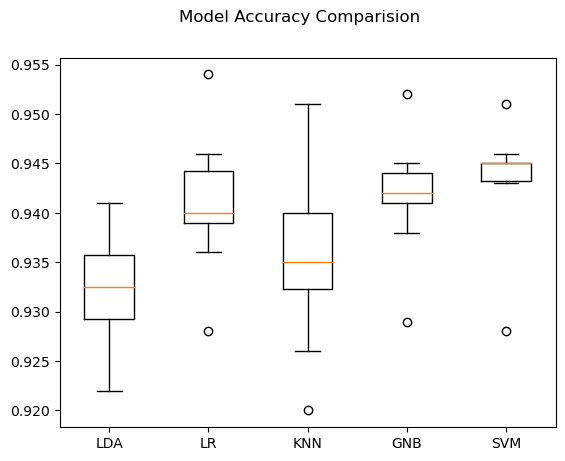

In [4]:
# setting up and showing boxplots
fig = plt.figure()
fig.suptitle("Model Accuracy Comparision")
ax = fig.add_subplot()
plt.boxplot(totalResults)
ax.set_xticklabels(algNames)
plt.show()

 > The boxplots above show just how much variance in accuracy can exist based on the supporting model.  Take SVM for example, where the boxplot is very short with only a few outliers on the lower and upper ends.  This shows relative low variance in our scores compared to KNN which had a majority of our scores ranging anywhere from the lower .920 to the upper .950. We're also able to see how LR, GNB, and SVM fare much better on average compared to LDA and KNN.

## Problem 2

In [5]:
# setting up cv, features for union, and steps for pipeline
kFold = KFold(n_splits=10, random_state=5, shuffle=True)

features = []
features.append(("PCA", PCA(n_components=3)))
features.append(("KBest", SelectKBest(k=6)))

steps = []
steps.append(("StdScaler", StandardScaler()))
steps.append(("FeatureUnion", FeatureUnion(features)))
steps.append(("LogRegression", LogisticRegression(solver='liblinear')))

# evaluating the pipeline
model = Pipeline(steps)
results = cross_val_score(model, data, target, cv=kFold)
print("Accuracy: %.3f" % results.mean())

Accuracy: 0.941


 > A 0.941 accuracy score is shows a solid pipeline model has been constructed.  However, comparing our pipeline to the above problem one, we can see how our pipeline seems to perform just as accurately to our repeatedKFold regression.

## Problem 3

In [6]:
# kFold for use in all 3 parts
kFold = KFold(n_splits=10, random_state=7, shuffle=True)

### (a)

In [7]:
# BaggingClassifier with DecisionTreeClassifier
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=7)
results = cross_val_score(model, data, target, cv=kFold)
print("Accuracy: %.3f" % results.mean())

Accuracy: 0.949


### (b)

In [8]:
# AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=30, random_state=7)
results = cross_val_score(model, data, target, cv=kFold)
print("Accuracy: %.3f" % results.mean())

Accuracy: 0.944


### (c)

In [9]:
# VotingClassifier
# setting up models
models = []
models.append(("LR", LogisticRegression(solver='liblinear')))
models.append(("DTC", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

#creating ensemble and results
ensemble = VotingClassifier(models)
results = cross_val_score(ensemble, data, target, cv=kFold)
print("Accuracy: %.3f" % results.mean())

Accuracy: 0.947


> All of these accuracies have reported the same, and also consistently compared to the previous individual models in problem 1.  This attests to their improved performance.